# import library

In [28]:
import pandas as pd
from wordcloud import WordCloud
import pyforest

# data

In [29]:
data = pd.read_csv("disney_plus_titles.csv")

# preprocessing data

In [30]:
# function for remove 's' 
def fix_ID(a):
    try:
        if a.startswith('s'):
            return int(a[1:])
        else:
            return 0
    except:
            return "Invalid"


data["show_id"]=data["show_id"].apply(fix_ID)


In [31]:
# fixing data type 
data['type'] = data['type'].astype('string')
data['show_id'] = data['show_id'].astype('int')


In [32]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   int32 
 1   type          1450 non-null   string
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int32(1), int64(1), object(9), string(1)
memory usage: 130.4+ KB


In [34]:
#Separating the duration of TV shows from movies to facilitate the visualization process
data['Season'] = data.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
data['duration'] = data.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [35]:
data.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
Season            0
dtype: int64

# Handling missing values

In [36]:
#Handling missing values
data['country']=data['country'].fillna('others')
data['cast']=data['cast'].fillna('others')
data['director']=data['director'].fillna('others')


In [37]:
# Drop rows with missing values in a specific column (e.g., "column_name")
data.dropna(subset=["date_added"], inplace=True)
data = data.reset_index(drop=True)

 
data.dropna(subset=["rating"], inplace=True)
data = data.reset_index(drop=True)

In [38]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Season          0
dtype: int64

In [39]:
#Replace coulomb values with more understandable values
 

for index, row in data.iterrows():
    if row['rating'] == 'TV-G' or row['rating'] == 'G':
        # Change the value in 'column_name' based on the condition
        data.at[index, 'rating'] = 'General Audience'
    elif row['rating'] == 'TV-PG' or row['rating'] == 'PG' or row['rating'] == 'PG-13' or row['rating'] == 'TV-Y7-FV':
        data.at[index, 'rating'] = 'Parental Guidance Suggested'
    elif row['rating'] == 'TV-Y' or row['rating'] == 'TV-Y7' or row['rating'] == 'TV-14':
        data.at[index, 'rating'] = 'Children'
    elif row['rating'] == 'R':
        data.at[index, 'rating'] = 'Adults'

In [40]:
data['Season'] = data['Season'].astype('int')
data['duration'] = data['duration'].astype('int')


In [41]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Season
1439,1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,Parental Guidance Suggested,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,0
1440,1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,Parental Guidance Suggested,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,0
1441,1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,Parental Guidance Suggested,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",0
1442,1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,Parental Guidance Suggested,112,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,0
1443,1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,General Audience,2,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.,0


In [26]:
data["show_id"] = np.arange(1, len(data) + 1)


<IPython.core.display.Javascript object>

In [27]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Season
1439,1440,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,Parental Guidance Suggested,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,0
1440,1441,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,Parental Guidance Suggested,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,0
1441,1442,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,Parental Guidance Suggested,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",0
1442,1443,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,Parental Guidance Suggested,112,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,0
1443,1444,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,General Audience,2,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.,0


# 5 number summery

In [59]:
data.describe()

,show_id,release_year,duration,Season
count,1444.000000,1444.000000,1444.000000,1444.000000
mean,722.500000,2003.036011,52.352493,0.576870
std,416.991207,21.886435,47.176624,1.577402
min,1.000000,1928.000000,0.000000,0.000000
25%,361.750000,1999.000000,0.000000,0.000000
50%,722.500000,2011.000000,47.000000,0.000000
75%,1083.250000,2018.000000,93.000000,1.000000
max,1444.000000,2021.000000,183.000000,32.000000


In [60]:
data.describe().round()

,show_id,release_year,duration,Season
count,1444.0,1444.0,1444.0,1444.0
mean,722.0,2003.0,52.0,1.0
std,417.0,22.0,47.0,2.0
min,1.0,1928.0,0.0,0.0
25%,362.0,1999.0,0.0,0.0
50%,722.0,2011.0,47.0,0.0
75%,1083.0,2018.0,93.0,1.0
max,1444.0,2021.0,183.0,32.0


<Axes: xlabel='Season'>

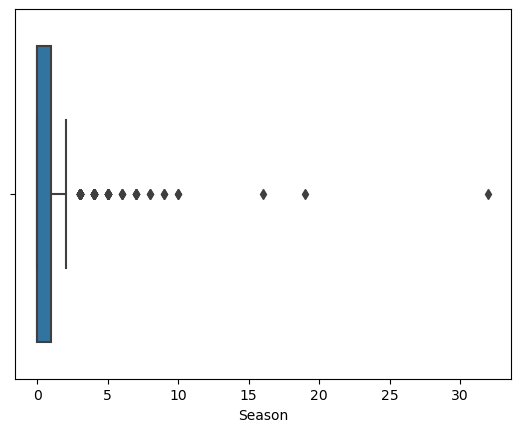

In [61]:
import seaborn as sns
sns.boxplot(x='Season',data=data)


### Shouldn't Take any Action

<Axes: xlabel='duration'>

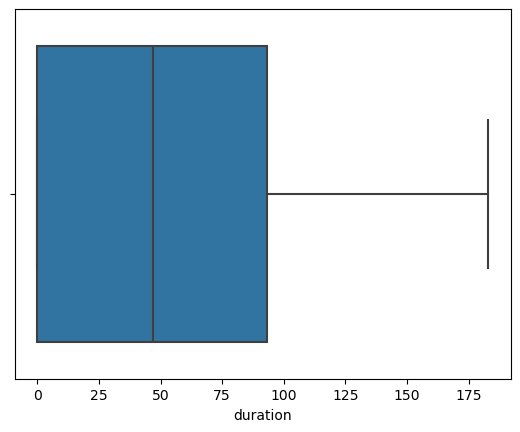

In [42]:
import seaborn as sns
sns.boxplot(x='duration',data=data)


<Axes: xlabel='Season'>

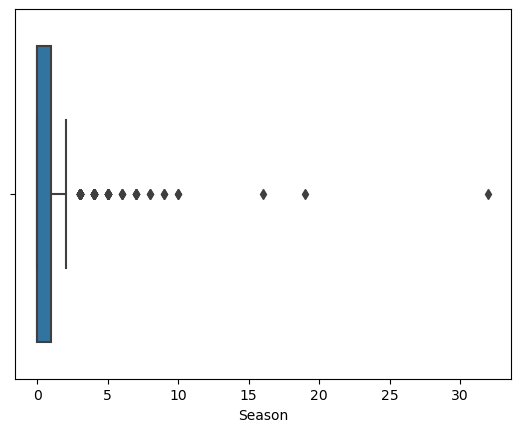

In [43]:
import seaborn as sns
sns.boxplot(x='Season',data=data)


# We have finished preprocessing stage

# Understanding Trends

## Q1-What are content trends?

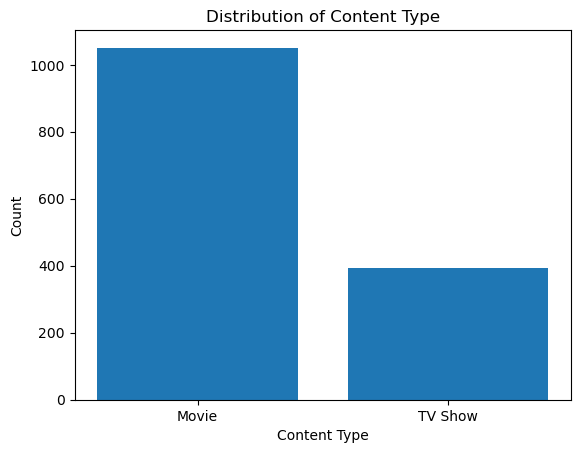

In [63]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
content_counts = data['type'].value_counts()
plt.bar(content_counts.index, content_counts.values)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Type')
plt.show()

## Q2-How many TV Shows and movies are on the system?

In [22]:
count_series_movies = data['type'].value_counts()
num_TV_Show = count_series_movies.get('TV Show', 0)
num_movies = count_series_movies.get('Movie', 0)

print("Number of tv-shows in the system:", num_TV_Show)
print("Number of movies in the system:", num_movies)

Number of tv-shows in the system: 393
Number of movies in the system: 1051


## Q3-top 10 countries Producing films

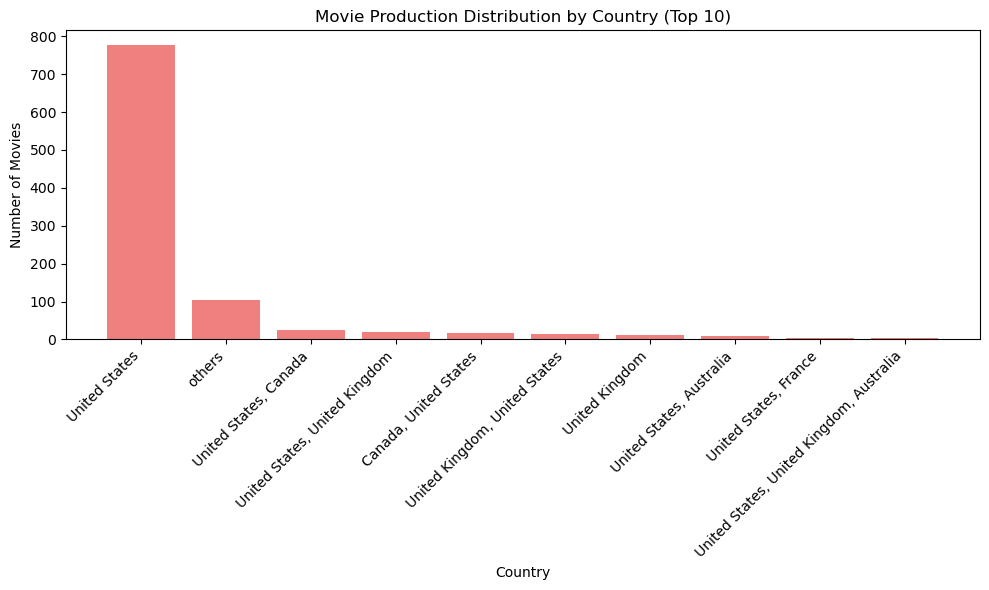

In [23]:
movie_counts_by_country = data[data['type'] == 'Movie']['country'].value_counts()
top_10_movies_by_country = movie_counts_by_country.head(10) 



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top_10_movies_by_country.index, top_10_movies_by_country.values, color='lightcoral')
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.title("Movie Production Distribution by Country (Top 10)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


## Q4-the most frequently occurring words in the titles of DATASET

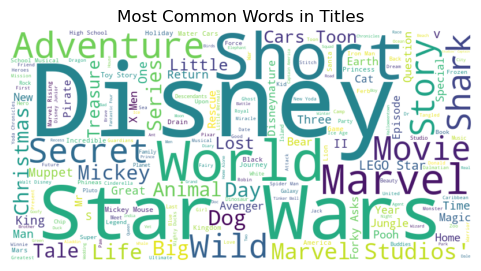

In [24]:
from wordcloud import WordCloud
all_words = ' '.join(data['title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()

## Q5-Identify the most frequently appearing cast members in DATASET

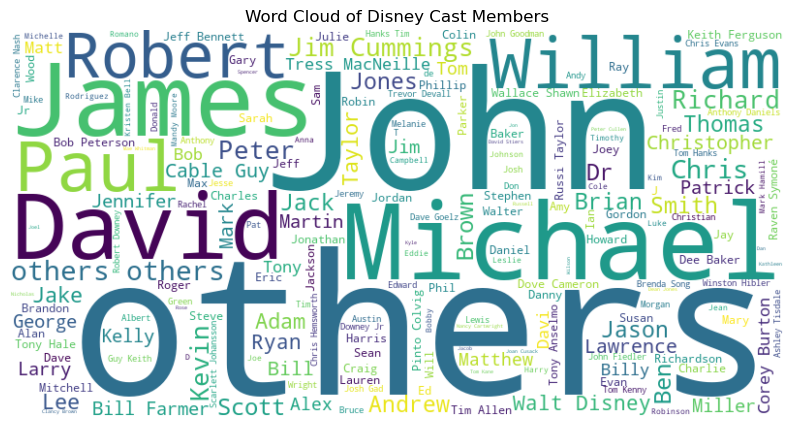

In [25]:
mask = data['cast'].notnull()
disney_castdf = data['cast'][mask]

# Combine all cast members into a single string
all_cast_members = ', '.join(disney_castdf)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cast_members)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Disney Cast Members')
plt.axis('off')
plt.show()


## Q6-identify the most frequently appearing DIRECTOR members in DATASET

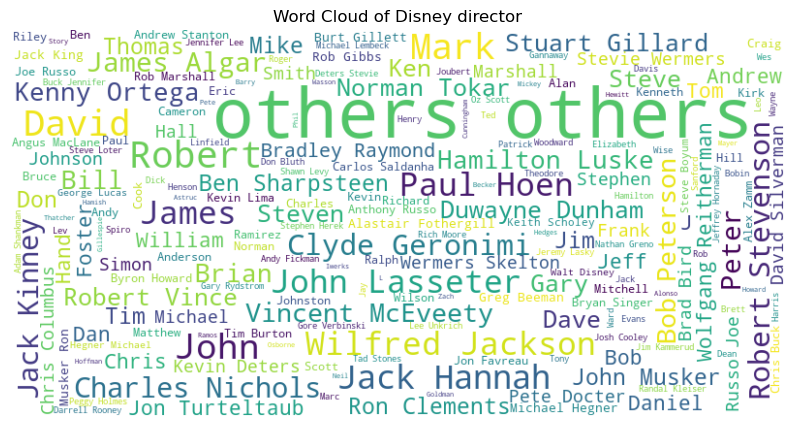

In [26]:
mask = data['director'].notnull()
disney_castdf = data['director'][mask]

# Combine all cast members into a single string
all_cast_members = ', '.join(disney_castdf)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cast_members)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Disney director')
plt.axis('off')
plt.show()

## Q7-Top 10 Movie Types

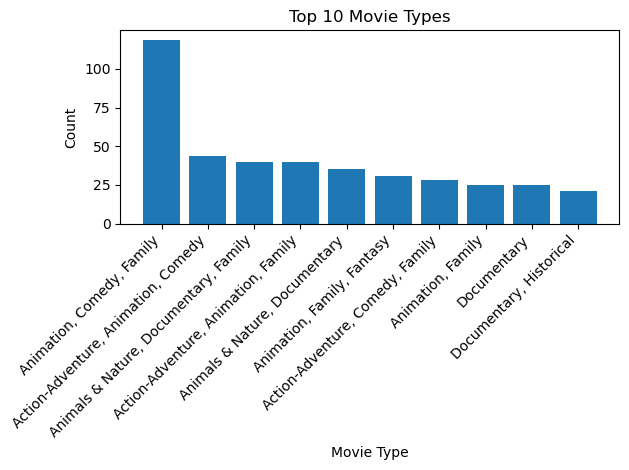

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

 

 
movies_df = data[data['type'] == 'Movie']

# Count occurrences of each movie type
movie_type_counts = movies_df['listed_in'].value_counts()

# Get the top 10 movie types
top_10_types = movie_type_counts.nlargest(10)

# Create the bar chart
plt.bar(top_10_types.index, top_10_types.values)
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.title('Top 10 Movie Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()


## Q8-Top 10 TV Show Types

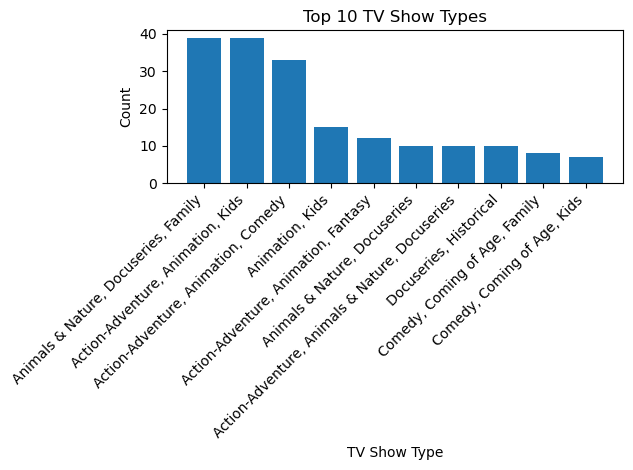

In [28]:
# Filter TV shows
tv_shows_df = data[data['type'] == 'TV Show']

# Count occurrences of each TV show type
tv_show_type_counts = tv_shows_df['listed_in'].value_counts()

# Get the top 10 TV show types
top_10_types = tv_show_type_counts.nlargest(10)

# Create the bar chart
plt.bar(top_10_types.index, top_10_types.values)
plt.xlabel('TV Show Type')
plt.ylabel('Count')
plt.title('Top 10 TV Show Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()


## Q9-The TV show with the most seasons

In [29]:
# Filter TV shows
tv_shows = data[data['type'] == 'TV Show']

# Find the TV show with the most seasons
most_seasons_show = tv_shows[tv_shows['Season'] == tv_shows['Season'].max()]

# Print the TV show with the most seasons and its number of seasons
print(f"The TV show with the most seasons is: {most_seasons_show['title'].values[0]}")
print(f"Number of seasons: {most_seasons_show['Season'].values[0]}")
print(f"Rating: {most_seasons_show['rating'].values[0]}")

The TV show with the most seasons is: The Simpsons
Number of seasons: 32
Rating: Parental Guidance Suggested


## Q10-How many documentaries are available on Disney Plus?

In [31]:
documentaries_df = data[data['listed_in'].str.contains('Documentary', case=False, na=False)]
num_documentaries = len(documentaries_df)
print(f"number of dec: {num_documentaries}")

number of dec: 173


## Q11-What is the most and least number of seasons in a series?

In [32]:
most_seasons = data['Season'].max()
least_seasons = data['Season'].min()
if least_seasons==(0):
  print('1')
else:
    print(least_seasons)
print(most_seasons)

1
32


## Q12- Count TV shows with 1 season

In [33]:
one_season_shows = data[data['Season'] == 1]['show_id'].count()



# Print the results
print(f"Number of TV shows with 1 season: {one_season_shows}")
 


Number of TV shows with 1 season: 217


## Q13-Filter shows with 1 season To get the highest failed combination

In [34]:
one_season_shows = data[data['Season'] == 1]

# Genre counts with DataFrame
genre_counts = one_season_shows['listed_in'].value_counts().sort_values(ascending=False)  # Count shows per genre, sort descending
total_one_season_shows = genre_counts.sum()  # Total shows with 1 season

# Calculate percentages
genre_percentages = (genre_counts / total_one_season_shows) * 100

# Print results
print(f"Percentage of TV shows with 1 season by genre:")
for genre, percentage in zip(genre_percentages.index, genre_percentages.values):
  print(f"{genre}: {percentage:.2f}%")


Percentage of TV shows with 1 season by genre:
Animals & Nature, Docuseries, Family: 11.98%
Action-Adventure, Animation, Kids: 10.14%
Action-Adventure, Animation, Comedy: 8.29%
Animals & Nature, Docuseries: 4.61%
Docuseries, Historical: 4.15%
Action-Adventure, Animals & Nature, Docuseries: 2.76%
Docuseries, Family: 2.30%
Family, Game Show / Competition: 2.30%
Animals & Nature, Docuseries, Reality: 2.30%
Docuseries: 1.84%
Animation, Comedy, Family: 1.84%
Animation, Kids: 1.84%
Animation, Comedy, Kids: 1.38%
Series: 1.38%
Animals & Nature, Docuseries, Kids: 1.38%
Reality: 1.38%
Docuseries, Reality: 1.38%
Animals & Nature, Docuseries, Survival: 0.92%
Action-Adventure, Animation, Fantasy: 0.92%
Anthology, Docuseries: 0.92%
Anthology, Docuseries, Family: 0.92%
Action-Adventure, Docuseries, Historical: 0.92%
Comedy, Coming of Age, Drama: 0.92%
Action-Adventure, Docuseries, Family: 0.92%
Comedy, Drama, Sports: 0.92%
Action-Adventure, Animation, Anthology: 0.92%
Animation, Kids, Music: 0.92%
A

### VISUALIZATION

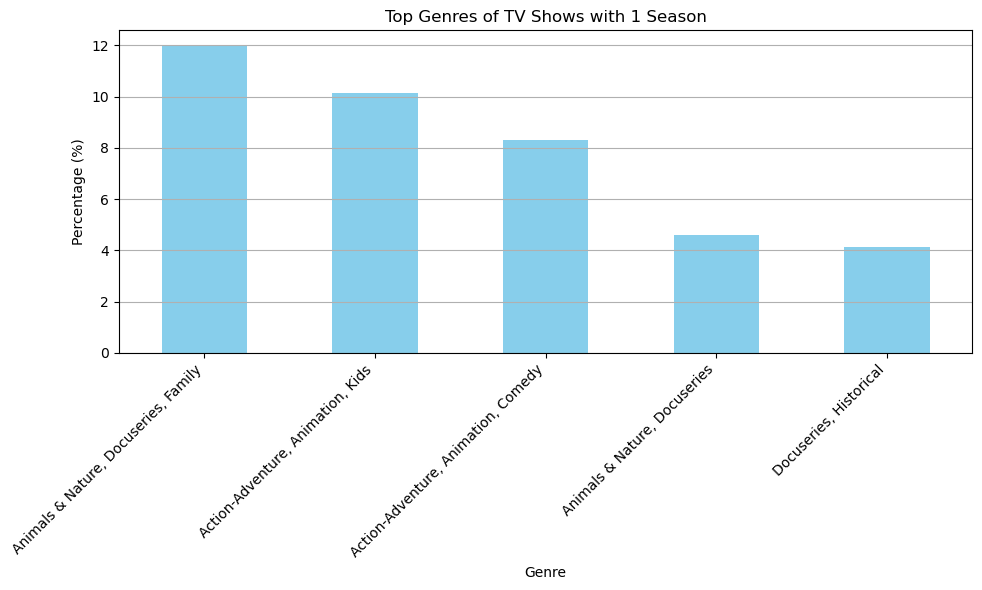

Genre with the highest percentage of 1-season shows: Animals & Nature, Docuseries, Family (11.98%)


In [35]:
one_season_shows = data[data['Season'] == 1]

# Genre counts with DataFrame
genre_counts = one_season_shows['listed_in'].value_counts().sort_values(ascending=False)  # Count shows per genre, sort descending
total_one_season_shows = genre_counts.sum()  # Total shows with 1 season

# Calculate percentages
genre_percentages = (genre_counts / total_one_season_shows) * 100

# Identify top 5 genres (or adjust as needed)
top_5_genres = genre_percentages.head(5)

# Visualization (Bar chart)
plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')
plt.title('Top Genres of TV Shows with 1 Season')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Print highest percentage
highest_genre = top_5_genres.index[0]  # Access index of the first element (highest percentage)
highest_percentage = top_5_genres.iloc[0]  # Access value of the first element
print(f"Genre with the highest percentage of 1-season shows: {highest_genre} ({highest_percentage:.2f}%)")


## Q14-Number of Movies and TV Shows Released by Year

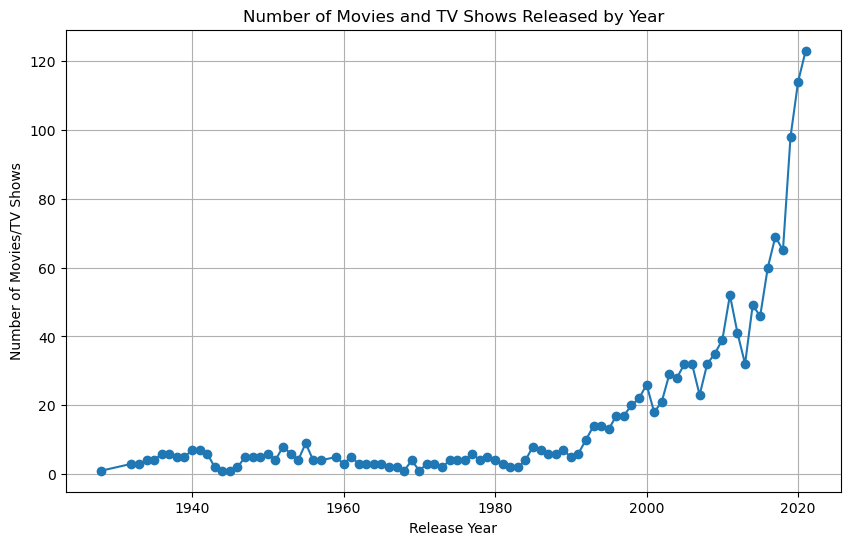

In [36]:

# Group data by release year and count the number of entries in each year
year_counts = data.groupby('release_year')['show_id'].count()

import matplotlib.pyplot as plt

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')  # Plot year on x, count on y
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Number of Movies and TV Shows Released by Year')
plt.grid(True)
plt.show()


## Q15- %Rating of Films vs %Rating of TV shows

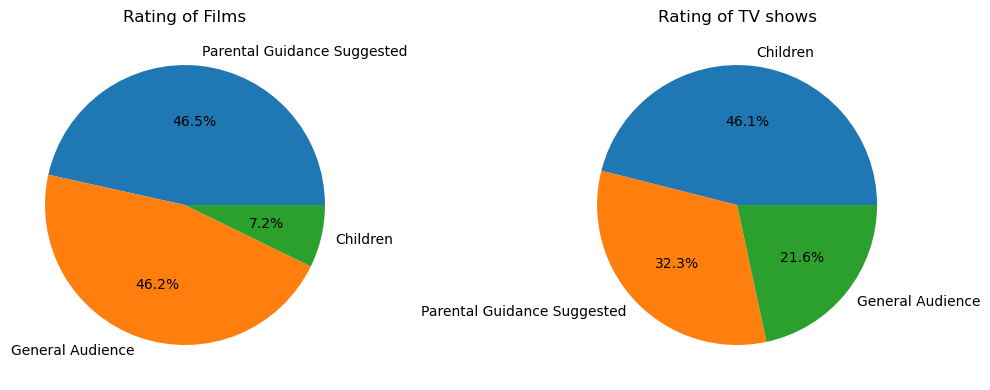

In [37]:
# Filter movies and TV shows
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

# Count occurrences of each rating (movies)
movie_ratings_count = movies['rating'].value_counts().sort_values(ascending=False)

# Count occurrences of each rating (TV shows)
tv_show_ratings_count = tv_shows['rating'].value_counts().sort_values(ascending=False)

# Create pie charts
plt.figure(figsize=(10, 6))

plt.subplot(121)  # Subplot for movies
plt.pie(movie_ratings_count, labels=movie_ratings_count.index, autopct='%1.1f%%')
plt.title('Rating of Films')

plt.subplot(122)  # Subplot for TV shows
plt.pie(tv_show_ratings_count, labels=tv_show_ratings_count.index, autopct='%1.1f%%')
plt.title('Rating of TV shows')

plt.tight_layout()
plt.show()

## Q16-num_children_movies

In [44]:
children_movies_df = data[data['rating'].str.contains('Children', case=False, na=False)]
num_children_movies = children_movies_df.shape[0]
print(num_children_movies)

257


## histogram to visualize the distribution of movie ratings

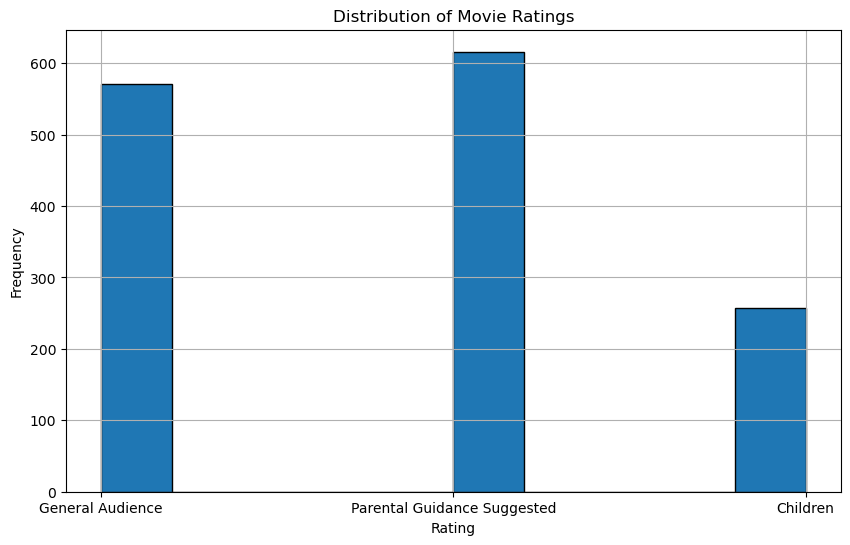

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['rating'].hist(bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.grid(True)
plt.show()


 


## creates a scatter plot to visualize the relationship between movie release years and their ratings

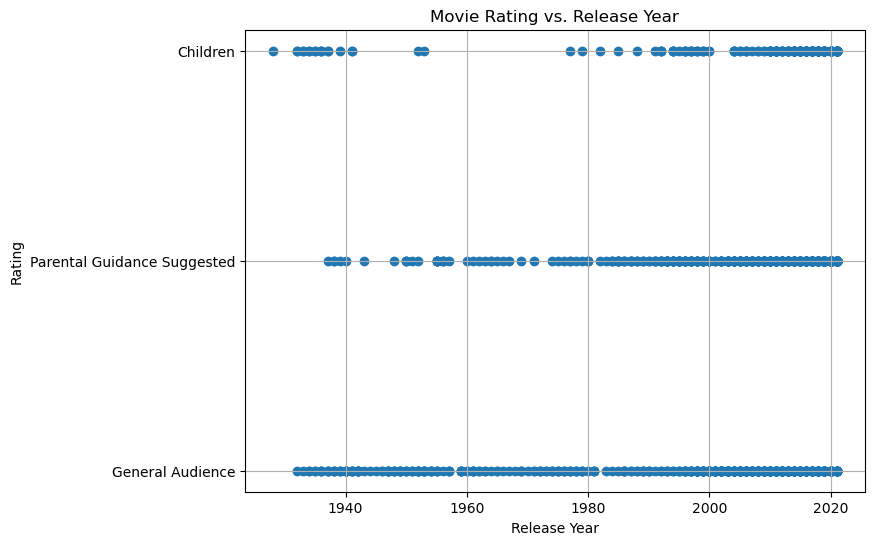

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['release_year'], data['rating'])
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Movie Rating vs. Release Year')
plt.grid(True)

 
plt.show()


### REF="https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows"


#### About this Dataset: Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.  The problem is that there are many missing values and overlapping data, as the company wants to obtain clear data to make some decisions

### REF='https://www.cloudskillsboost.google/paths/18'